<h1><b>FINALS PROJECT DATA ANALYTICS</b></h1>
<hr>
<h2>Dapatnapo, Katrina and Verastigue, Willmyr Kurt M.<h2>
<h4>BSIT-3B</h4>
<hr>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
pd = pd.read_csv('Family.csv')
pd

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle,Year1,Year2
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,0,0,0,2,1,0,0,1,2023,2024
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,0,0,3,1,0,0,2,2023,2024
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,2023,2024
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,1,0,0,0,0,2023,2024
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,0,0,0,3,0,0,0,1,2023,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,1,0,0,0,0,2023,2024
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,3,0,0,0,0,2023,2024
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,1,0,0,0,0,2023,2024
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,2,0,0,0,0,2023,2024


In [3]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 62 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [4]:
pd.isnull().sum()

Total Household Income                 0
Region                                 0
Total Food Expenditure                 0
Main Source of Income                  0
Agricultural Household indicator       0
                                      ..
Number of Stove with Oven/Gas Range    0
Number of Motorized Banca              0
Number of Motorcycle/Tricycle          0
Year1                                  0
Year2                                  0
Length: 62, dtype: int64

In [5]:
pd['Household Head Occupation'] = pd['Household Head Occupation'].fillna(pd['Household Head Occupation'].mode()[0])
pd['Household Head Class of Worker'] = pd['Household Head Class of Worker'].fillna(pd['Household Head Class of Worker'].mode()[0])
pd['Toilet Facilities'] = pd['Toilet Facilities'].fillna(pd['Toilet Facilities'].mode()[0])

In [6]:
pd.isnull().sum()

Total Household Income                 0
Region                                 0
Total Food Expenditure                 0
Main Source of Income                  0
Agricultural Household indicator       0
                                      ..
Number of Stove with Oven/Gas Range    0
Number of Motorized Banca              0
Number of Motorcycle/Tricycle          0
Year1                                  0
Year2                                  0
Length: 62, dtype: int64

In [7]:
pd.dtypes

Total Household Income                  int64
Region                                 object
Total Food Expenditure                  int64
Main Source of Income                  object
Agricultural Household indicator        int64
                                        ...  
Number of Stove with Oven/Gas Range     int64
Number of Motorized Banca               int64
Number of Motorcycle/Tricycle           int64
Year1                                   int64
Year2                                   int64
Length: 62, dtype: object

In [8]:
pd['Electricity'].value_counts()

Electricity
1    37008
0     4536
Name: count, dtype: int64

<h2>Question No.6</h2>
<h3>What Region has the highest income and the lowest income and what socio-economic factors might explain the disparities observed among these regions??</h3>

In [42]:
region_income = pd.groupby("Region")["Total Household Income"].mean().reset_index()


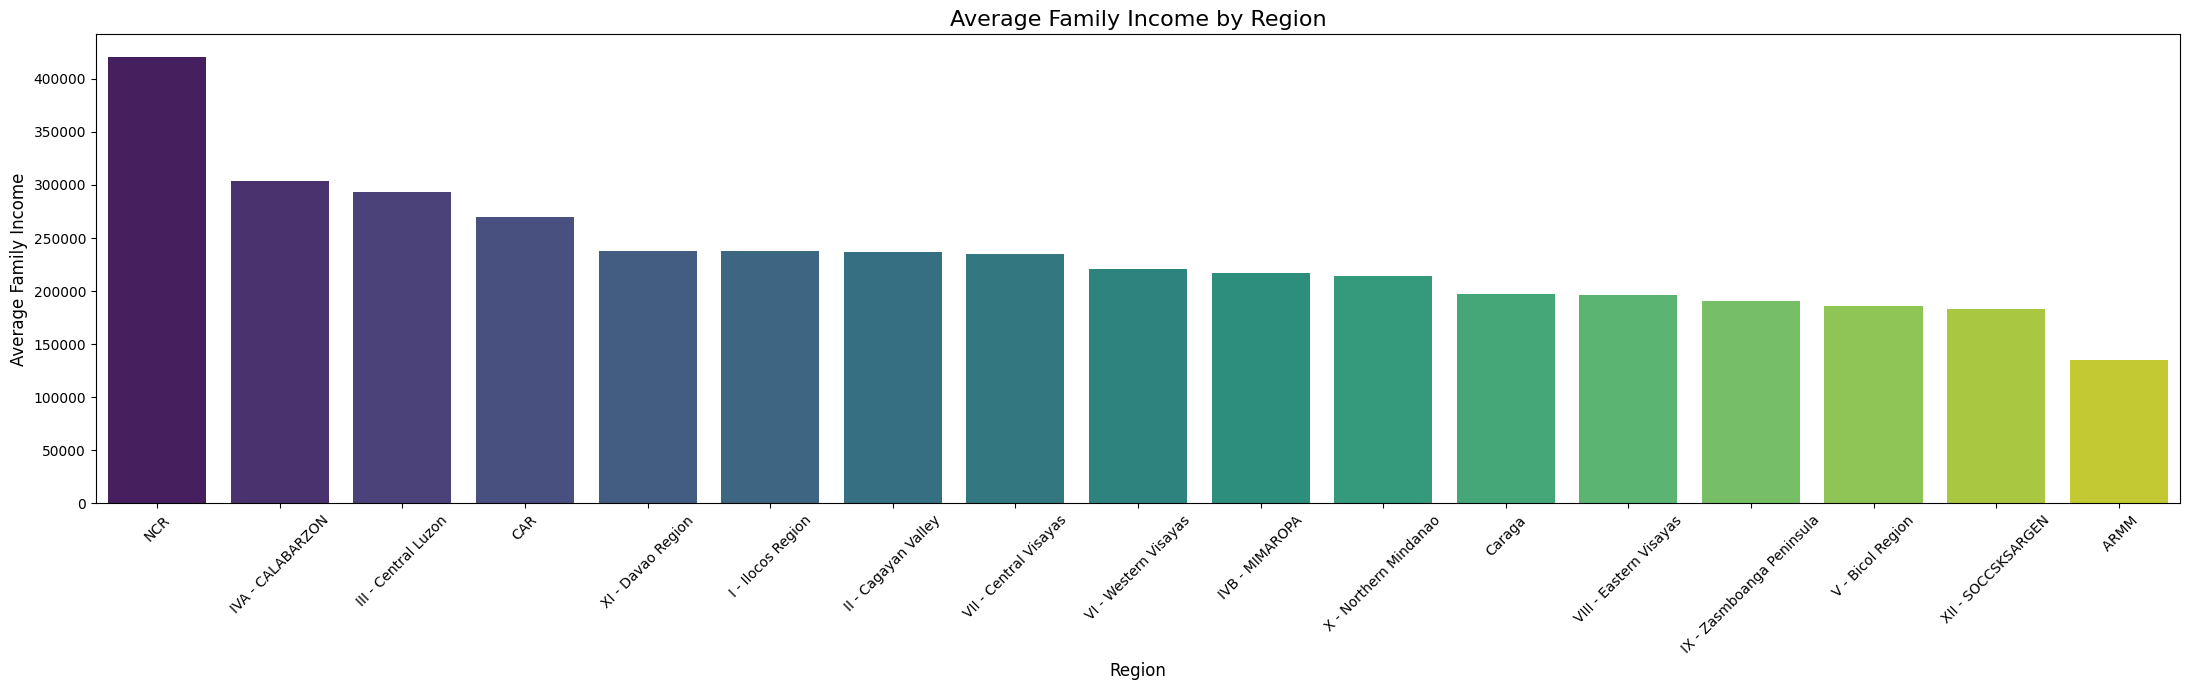

In [47]:
region_income = region_income.sort_values("Total Household Income", ascending=False)

plt.figure(figsize=(22,7))
sns.barplot(x="Region", y="Total Household Income", data=region_income, palette="viridis")
plt.title("Average Family Income by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Family Income", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
region_income

,Region,Total Household Income
9,NCR,420861.861501
6,IVA - CALABARZON,303360.536040
5,III - Central Luzon,292965.181650
1,CAR,269540.484638
15,XI - Davao Region,238115.891251
3,I - Ilocos Region,238110.084327
4,II - Cagayan Valley,236778.221721
12,VII - Central Visayas,234909.314050
11,VI - Western Visayas,220481.260260
7,IVB - MIMAROPA,216685.124900


<h2>Insights No.6</h2>
<h4>Based on the bar chart titled "Average Family Income by Region," a significant disparity is evident between the National Capital Region (NCR) and Region XII, SOCCSKSARGEN. NCR ranks highest in terms of average family income, with figures approaching ₱400,000, while SOCCSKSARGEN ranks lowest among the listed regions, with an estimated average income between ₱150,000 and ₱170,000. This contrast highlights the unequal distribution of economic resources and opportunities across the country. NCR’s elevated income levels can be attributed to its status as the nation’s political, commercial, and industrial center, which attracts investments and provides diverse employment opportunities. In contrast, SOCCSKSARGEN, despite its agricultural potential and strategic location, faces challenges in infrastructure development, industrialization, and access to high-paying jobs. This income gap underscores the need for inclusive regional development policies aimed at reducing economic inequality and promoting balanced growth across all regions.</h4>

<h2>Question No.7</h2>
<h3>What factors might explain the regional differences in average household expenditure on meat versus fish and marine products across the Philippines, particularly in coastal versus inland regions?</h3>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
features = ["Region", "Total Number of Family members", "Household Head Marital Status"]
target = "Total Household Income"

In [14]:
region_exp = pd.groupby("Region")[["Meat Expenditure", "Total Fish and  marine products Expenditure"]].mean()
region_exp

,Meat Expenditure,Total Fish and marine products Expenditure
Region,,
ARMM,2255.032473,12603.984431
CAR,12220.992464,8357.065507
Caraga,8046.477553,10338.594276
I - Ilocos Region,11827.419080,8791.235945
II - Cagayan Valley,12307.674178,8666.757999
III - Central Luzon,15639.873031,11289.561631
IVA - CALABARZON,15090.317876,10737.155935
IVB - MIMAROPA,7919.929544,9181.916733
IX - Zasmboanga Peninsula,6074.474832,10458.001678


In [15]:
region_exp["Higher_Expenditure"] = region_exp.apply(
    lambda row: "Meat" if row["Meat Expenditure"] > row["Total Fish and  marine products Expenditure"] else "Fish", axis=1
)
print("\nWhich expenditure is higher per region:")
print(region_exp["Higher_Expenditure"])


Which expenditure is higher per region:
Region
 ARMM                        Fish
CAR                          Meat
Caraga                       Fish
I - Ilocos Region            Meat
II - Cagayan Valley          Meat
III - Central Luzon          Meat
IVA - CALABARZON             Meat
IVB - MIMAROPA               Fish
IX - Zasmboanga Peninsula    Fish
NCR                          Meat
V - Bicol Region             Fish
VI - Western Visayas         Fish
VII - Central Visayas        Fish
VIII - Eastern Visayas       Fish
X - Northern Mindanao        Fish
XI - Davao Region            Fish
XII - SOCCSKSARGEN           Fish
Name: Higher_Expenditure, dtype: object


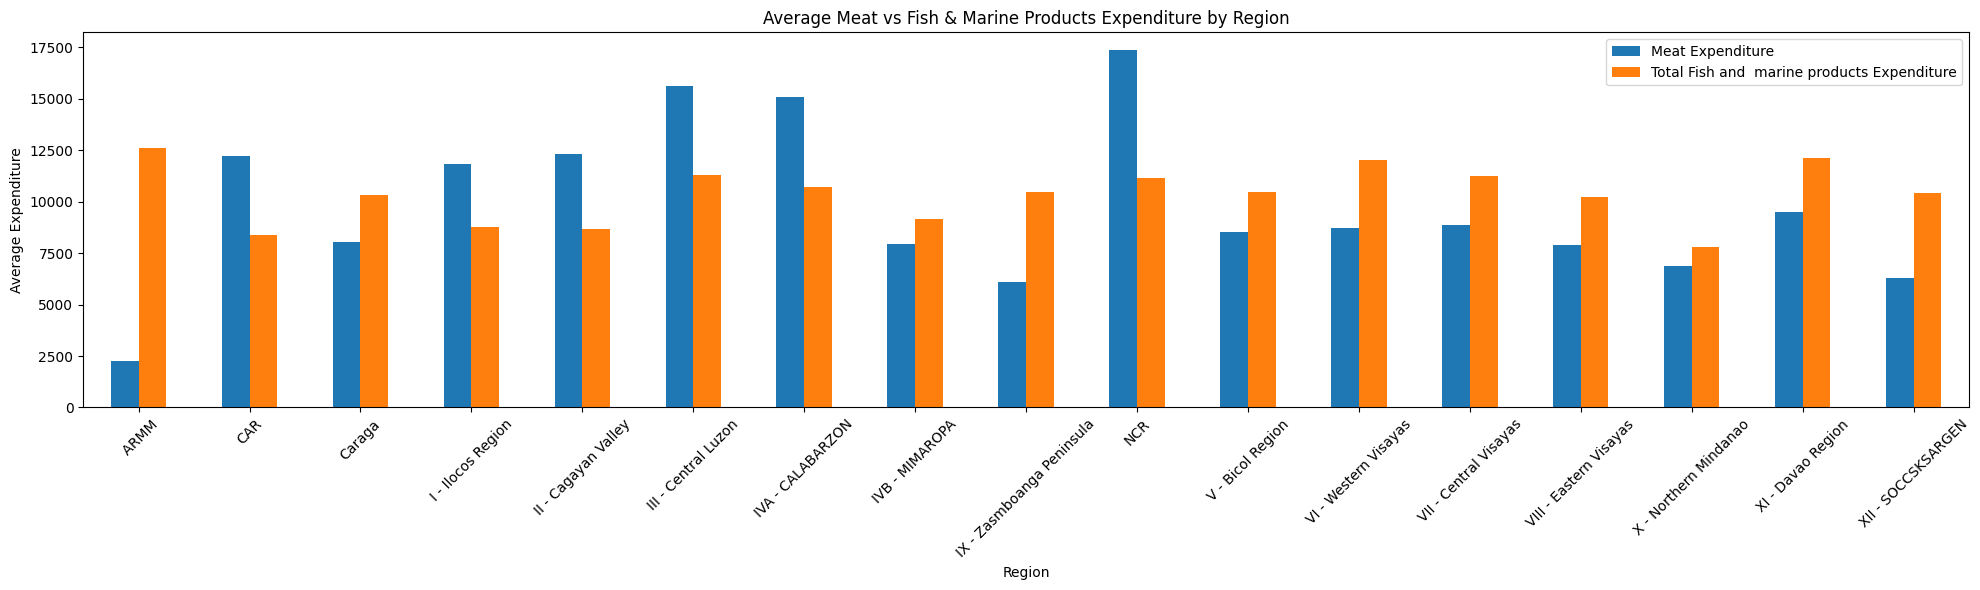

In [48]:
region_exp.plot(kind="bar", figsize=(20,6))
plt.title("Average Meat vs Fish & Marine Products Expenditure by Region")
plt.ylabel("Average Expenditure")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Insights No.7</h2>
<h3>Based on the bar chart titled "Average Meat vs Fish & Marine Products Expenditure by Region," notable regional differences in food spending preferences are evident across the Philippines. The data reveals that regions such as the National Capital Region (NCR), CALABARZON, and Central Luzon exhibit significantly higher average expenditures on meat compared to fish and marine products. This trend may reflect urban dietary patterns, greater access to meat products, and higher income levels that allow for more diversified protein consumption. Conversely, regions like ARMM, MIMAROPA, and Eastern Visayas show a stronger preference for fish and marine products, with expenditures on these items surpassing or closely matching meat spending. These areas are geographically coastal and traditionally reliant on fishing industries, which likely influence local consumption habits and availability. The contrast between regions suggests that food expenditure is shaped not only by economic capacity but also by cultural practices, geographic access, and local industries. Understanding these patterns is essential for policymakers and nutrition planners aiming to address food security, promote balanced diets, and support regional agricultural and fisheries development.
</h3>

In [17]:
y = pd['Total Household Income']

In [18]:
features = ['Region', 'Total Food Expenditure', 'Medical Care Expenditure', 'Education Expenditure', 'Total Number of Family members', 'Year1', 'Year2']

X = pd[features]

In [19]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Food Expenditure,41544.0,85099.158194,51637.947682,2947.0,51017.25,72985.5,105635.5,827565.0
Medical Care Expenditure,41544.0,7160.230936,26902.002275,0.0,300.00,1125.0,4680.0,1049275.0
Education Expenditure,41544.0,7473.500481,21219.170907,0.0,0.00,880.0,4060.0,731000.0
Total Number of Family members,41544.0,4.635182,2.280252,1.0,3.00,4.0,6.0,26.0
Year1,41544.0,2023.000000,0.000000,2023.0,2023.00,2023.0,2023.0,2023.0
Year2,41544.0,2024.000000,0.000000,2024.0,2024.00,2024.0,2024.0,2024.0


In [20]:
import matplotlib.pyplot as plt

In [21]:
pd.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

<h2>Question No.8</h2>
<h3>According to the pie chart, what percentage of families do not own a vehicle, and how does this compare to the percentage of families that do own a vehicle?</h3>

In [22]:
pd["Total_Vehicles"] = pd["Number of Car, Jeep, Van"]
pd["Vehicle_Ownership"] = pd["Total_Vehicles"].apply(lambda x: "Owns Vehicle" if x > 0 else "No Vehicle")

fams = pd[pd["Type of Household"].isin(["Single Family", "Extended Family"])]

famsres = (fams.groupby(["Type of Household", "Vehicle_Ownership"]).size().reset_index(name="Total Counts"))

In [23]:
display(famsres)

,Type of Household,Vehicle_Ownership,Total Counts
0,Extended Family,No Vehicle,11895
1,Extended Family,Owns Vehicle,1037
2,Single Family,No Vehicle,26837
3,Single Family,Owns Vehicle,1608


In [24]:
total_owns_vehicle = famsres[famsres["Vehicle_Ownership"] == "Owns Vehicle"]["Total Counts"].sum()
total_no_vehicle = famsres[famsres["Vehicle_Ownership"] == "No Vehicle"]["Total Counts"].sum()

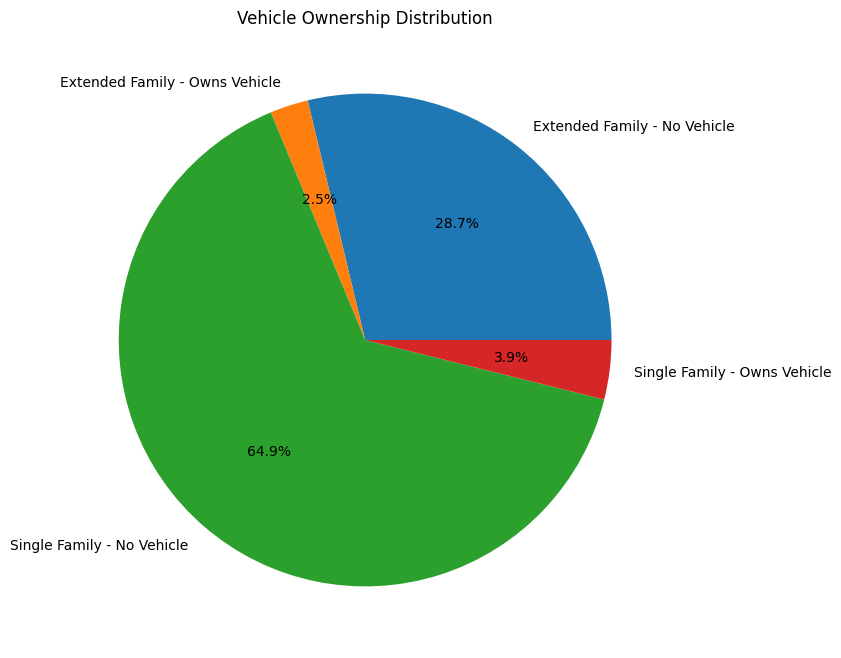

In [25]:
labels = famsres["Type of Household"] + " - " + famsres["Vehicle_Ownership"]
values = famsres["Total Counts"]
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Vehicle Ownership Distribution")
plt.show()

<h2>Insights No.8</h2>
<h3>Based on the pie chart, it is evident that the majority of families do not own a vehicle. Specifically, 64.9% of households are categorized as single families without a vehicle, while 28.7% are extended families without a vehicle. In contrast, only a small fraction of the population owns vehicles, with 3.9% being single families and 2.5% being extended families. The numerical data supports this observation, indicating that out of the total population, only 2,645 families own a vehicle, whereas 38,732 families do not. This significant disparity suggests that vehicle ownership is extremely limited across both single and extended family structures. Such findings have important implications for urban planning and public policy, highlighting the need to prioritize accessible public transportation, non-motorized mobility infrastructure, and potentially subsidized vehicle programs to address mobility challenges in underserved communities.</h3>

<h2>PREDICTION</h2>

<h2>Question No.9</h2>
<h3>Given a household’s income, how much do we expect them to spend on food?</h3>

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X = pd[["Total Household Income"]]
y = pd["Total Food Expenditure"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Predicted Expenditure:", predictions[:10])

Predicted Expenditure: [ 64929.00135766 118597.66370905  95025.85431383  67392.66881003
  58713.00234608  96833.50660766  82199.33133403  69354.25628783
  72450.10301594  70436.96897386]


In [28]:
pd.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [49]:
future_income = [[300000]]  # change to your value
future_prediction = model.predict(future_income)

print("Predicted Expenditure for Family Income 300k:", future_prediction)

Predicted Expenditure for Family Income 300k: [91121.81851534]


<h2>Insights No.9</h2>
<h3>The model predicts that as household income increases, food expenditure also rises. Based on the results, expected spending ranges from approximately ₱58,713.00 to ₱118,597.66, reflecting a positive linear relationship between income and food costs, For a household earning ₱300,000, the model predicts a food expenditure of approximately ₱91,121.82, indicating a direct relationship between income and spending.</h3>

In [30]:
features = ['Total Household Income', 'Total Food Expenditure', 'Bread and Cereals Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure',  'Vegetables Expenditure']

X = pd[features]

In [31]:
X

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure
0,480332,117848,42140,24676,16806,3325,13460
1,198235,67766,17329,17434,11073,2035,7833
2,82785,61609,34182,7783,2590,1730,3795
3,107589,78189,34030,10914,10812,690,7887
4,189322,94625,34820,18391,11309,1395,11260
...,...,...,...,...,...,...,...
41539,119773,44875,23675,1476,6120,1632,3882
41540,137320,31157,2691,1886,4386,1840,3110
41541,133171,45882,28646,480,4796,1232,3025
41542,129500,81416,29996,2359,17730,2923,7951


In [32]:
from sklearn.tree import DecisionTreeRegressor

# Define model
my_model = DecisionTreeRegressor()

# Fit model
my_model.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [33]:
predictions = my_model.predict(X)

In [34]:

predictions

array([117848.,  67766.,  61609., ...,  45882.,  81416.,  78195.],
      shape=(41544,))

In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(y, predictions)
print("R² Score:", r2)

R² Score: 1.0


In [36]:

from sklearn.linear_model import LinearRegression

In [37]:
lr= LinearRegression()

In [38]:
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
lr_predict = lr.predict(X)

In [40]:
lr2 = r2_score(y, lr_predict)
print("R² Score:", lr2)
print(f" The model variation is at{lr2:.1%}")

R² Score: 1.0
 The model variation is at100.0%


<h2>Question No.10</h2>
<h3>Is there a Correlation between the Miscellaneous Goods and Restaurant & Hotels Expenditure ?</h3>

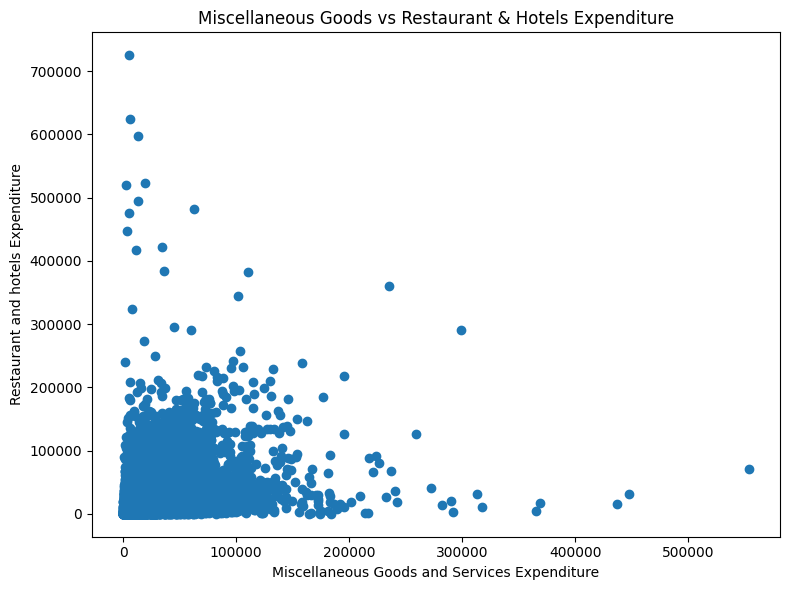

In [53]:
cor1 = "Miscellaneous Goods and Services Expenditure"
cor2 = "Restaurant and hotels Expenditure"

subs = pd[[cor1, cor2]].dropna()

correlation_value = subs.corr().iloc[0, 1]

plt.figure(figsize=(8,6))
plt.scatter(pd[cor1], pd[cor2])

plt.xlabel(cor1)
plt.ylabel(cor2)
plt.title("Miscellaneous Goods vs Restaurant & Hotels Expenditure")
plt.tight_layout()
plt.show()

In [54]:
print("=== Specific Correlation Result ===")
print(f"Correlation between '{cor1}' and '{cor2}': {correlation_value}")

=== Specific Correlation Result ===
Correlation between 'Miscellaneous Goods and Services Expenditure' and 'Restaurant and hotels Expenditure': 0.46243709202360095


<h2>Insights No.10</h2>
<h3>There is a correlation between the two variables. The computed correlation coefficient is approximately 0.462, which indicates a moderate positive relationship. This means that as household spending on Miscellaneous Goods and Services increases, their spending on Restaurants and Hotels also tends to increase. However, since the value is not close to 1, the relationship is not very strong, suggesting that while the two expenditures are related, other factors also influence household spending in these categories.</h3>